In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./Bangkok.txt', sep = "\t", names = ['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'] ,header=None)
df

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0
...,...,...,...,...,...,...,...
40236,2021,6,1,16,15.6,0.0,0
40237,2021,6,1,16,15.6,0.0,0
40238,2021,6,1,16,15.6,0.0,0
40239,2021,6,1,16,15.6,0.0,0


In [5]:
#df = pd.read_csv('/content/drive/MyDrive/PM2.5 Project/Samut_Sakhon.txt', sep = "\t", names = ['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective'] ,header=None)
#df

In [6]:
data = df.drop(columns=['PM10_mask', 'Retrospective'])
data

,Year,Month,Day,UTC Hour,PM2.5
0,2016,3,3,8,62.9
1,2016,3,3,9,62.9
2,2016,3,3,10,55.5
3,2016,3,3,11,55.5
4,2016,3,3,12,47.9
...,...,...,...,...,...
40236,2021,6,1,16,15.6
40237,2021,6,1,16,15.6
40238,2021,6,1,16,15.6
40239,2021,6,1,16,15.6


In [7]:
data.columns

Index(['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5'], dtype='object')

#Create Model

In [8]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split

In [9]:
y = data['PM2.5']
X = data[['Year', 'Month', 'Day', 'UTC Hour']]

In [10]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32192, 4) (8049, 4) (32192,) (8049,)


In [11]:
X_train.head

<bound method NDFrame.head of        Year  Month  Day  UTC Hour
13118  2017     10   18        14
13491  2017     11    4        12
34527  2020      7   20         3
28240  2019     10   15        14
9957   2017      5   30         3
...     ...    ...  ...       ...
5101   2016     10   14        11
5729   2016     11   12         0
7058   2017      1    7         9
22214  2018     11   27         8
21877  2018     11   12        11

[32192 rows x 4 columns]>

In [12]:
y_train.head

<bound method NDFrame.head of 13118    32.4
13491    37.1
34527    17.9
28240    18.5
9957     20.4
         ... 
5101     31.5
5729     23.3
7058     29.3
22214    27.7
21877    18.8
Name: PM2.5, Length: 32192, dtype: float64>

In [13]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (32192, 4)
y_train shape: (32192,)


In [14]:
print(X_train)

       Year  Month  Day  UTC Hour
13118  2017     10   18        14
13491  2017     11    4        12
34527  2020      7   20         3
28240  2019     10   15        14
9957   2017      5   30         3
...     ...    ...  ...       ...
5101   2016     10   14        11
5729   2016     11   12         0
7058   2017      1    7         9
22214  2018     11   27         8
21877  2018     11   12        11

[32192 rows x 4 columns]


In [15]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [16]:
n_steps = 1
n_features = 4
b_size = 100
look_back = 1

In [17]:
def trim_data(data, batch_size):
  """
  Trims out the extra data that does not fit into batches
  EX:
  dim, batch_size = 192, 50
  to
  dim, batch_size = 150, 50

  PARAMETERS
  ----------
  data: ndarray
    The data that you want to trim
  batch_size: int
    The batch size
  """
  extra = data.shape[0] % batch_size
  if (extra == 0):
    return data
  return data[:-extra]

In [18]:
X_train = trim_data(X_train, b_size)
y_train = trim_data(y_train, b_size)
X_test  = trim_data(X_test, b_size)
y_test  = trim_data(y_test, b_size)

In [19]:
assert X_train.shape[0] == y_train.shape[0], "Train dimension mismatch"
assert X_test.shape[0] == y_test.shape[0], "Test dimension mismatch"

In [20]:
print(X_train)

[[2017   10   18   14]
 [2017   11    4   12]
 [2020    7   20    3]
 ...
 [2020    5    8    4]
 [2016    4   27   13]
 [2018    4   20   21]]


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32100, 4) (8000, 4) (32100,) (8000,)


In [22]:
X_train_len = X_train.shape[0]
X_test_len = X_test.shape[0]
y_train_len = y_train.shape[0]
y_test_len = y_test.shape[0]

In [23]:
X_train = X_train.reshape(X_train_len, n_steps, n_features)
X_test  = X_test.reshape(X_test_len, n_steps, n_features)

In [24]:
print(X_train)

[[[2017   10   18   14]]

 [[2017   11    4   12]]

 [[2020    7   20    3]]

 ...

 [[2020    5    8    4]]

 [[2016    4   27   13]]

 [[2018    4   20   21]]]


#Apply Model

In [25]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from tensorflow.keras.models import load_model, Model 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Bidirectional, RepeatVector, TimeDistributed, Input, Flatten, Dropout, InputLayer
from keras.layers import LSTM, Activation
from keras.preprocessing.sequence import pad_sequences

from statsmodels.tools.eval_measures import rmse
from tabulate import tabulate

##Adamax elu relu

In [26]:
###Stack LSTM###
model1 = Sequential()
model1.add(LSTM(200, activation="elu", input_shape=(n_steps, n_features), return_sequences=True))
model1.add(LSTM(200, activation="relu"))
model1.add(Dense(1))
model1.compile(optimizer="Adamax", loss="mse", metrics=['accuracy'])

In [27]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
model1.fit(X_train, y_train, batch_size=b_size, epochs=400, callbacks=[checkpoint], verbose=1)

Epoch 1/400
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 3s 5ms/step - loss: 186.5383 - accuracy: 0.0000e+00
Epoch 2/400
321/321 [==============================] - 2s 5ms/step - loss: 180.1041 - accuracy: 0.0000e+00
Epoch 3/400
321/321 [==============================] - 1s 5ms/step - loss: 177.2117 - accuracy: 0.0000e+00
Epoch 4/400
321/321 [==============================] - 1s

In [28]:
model1.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 2ms/step - loss: 91.5375 - accuracy: 0.0000e+00


[91.53752899169922, 0.0]

In [29]:
prediction_result_model1 = model1.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Adamax elu relu 200

In [30]:
###Stack LSTM###
model2 = Sequential()
model2.add(LSTM(200, activation="elu", input_shape=(n_steps, n_features), return_sequences=True))
model2.add(LSTM(200, activation="relu"))
model2.add(Dense(1))
model2.compile(optimizer="Adamax", loss="mse", metrics=['accuracy'])

In [31]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
model2.fit(X_train, y_train, batch_size=b_size, epochs=200, callbacks=[checkpoint], verbose=1)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 4s 6ms/step - loss: 190.3393 - accuracy: 0.0000e+00
Epoch 2/200
321/321 [==============================] - 2s 6ms/step - loss: 179.7000 - accuracy: 0.0000e+00
Epoch 3/200
321/321 [==============================] - 2s 6ms/step - loss: 178.8542 - accuracy: 0.0000e+00
Epoch 4/200
321/321 [==============================] - 2s

In [32]:
model2.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 2ms/step - loss: 94.2774 - accuracy: 0.0000e+00


[94.27739715576172, 0.0]

In [33]:
prediction_result_model2 = model2.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Adamax sigmoid tanh

In [34]:
###Stack LSTM###
model3 = Sequential()
model3.add(LSTM(200, activation="sigmoid", input_shape=(n_steps, n_features), return_sequences=True))
model3.add(LSTM(200, activation="tanh"))
model3.add(Dense(1))
model3.compile(optimizer="Adamax", loss="mse", metrics=['accuracy'])

In [35]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
model3.fit(X_train, y_train, batch_size=b_size, epochs=500, callbacks=[checkpoint], verbose=1)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 4s 6ms/step - loss: 239.1391 - accuracy: 0.0000e+00
Epoch 2/500
321/321 [==============================] - 2s 6ms/step - loss: 182.2247 - accuracy: 0.0000e+00
Epoch 3/500
321/321 [==============================] - 2s 6ms/step - loss: 182.2324 - accuracy: 0.0000e+00
Epoch 4/500
321/321 [==============================] - 2s

In [36]:
model3.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 2ms/step - loss: 101.0601 - accuracy: 0.0000e+00


[101.06014251708984, 0.0]

In [37]:
prediction_result_model3 = model3.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Adamax sigmoid tanh 400

In [38]:
###Stack LSTM###
model4 = Sequential()
model4.add(LSTM(200, activation="sigmoid", input_shape=(n_steps, n_features), return_sequences=True))
model4.add(LSTM(200, activation="tanh"))
model4.add(Dense(1))
model4.compile(optimizer="Adamax", loss="mse", metrics=['accuracy']) 

In [41]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
model4.fit(X_train, y_train, batch_size=b_size, epochs=400, callbacks=[checkpoint], verbose=1)

Epoch 1/400
321/321 [==============================] - 2s 5ms/step - loss: 102.0616 - accuracy: 0.0000e+00
Epoch 2/400
321/321 [==============================] - 2s 5ms/step - loss: 101.9911 - accuracy: 0.0000e+00
Epoch 3/400
321/321 [==============================] - 2s 5ms/step - loss: 102.3393 - accuracy: 0.0000e+00
Epoch 4/400
321/321 [==============================] - 1s 5ms/step - loss: 102.1825 - accuracy: 0.0000e+00
Epoch 5/400
321/321 [==============================] - 2s 5ms/step - loss: 102.6140 - accuracy: 0.0000e+00
Epoch 6/400
321/321 [==============================] - 2s 5ms/step - loss: 101.8462 - accuracy: 0.0000e+00
Epoch 7/400
321/321 [==============================] - 2s 5ms/step - loss: 101.8540 - accuracy: 0.0000e+00
Epoch 8/400
321/321 [==============================] - 2s 5ms/step - loss: 102.0859 - accuracy: 0.0000e+00
Epoch 9/400
321/321 [==============================] - 2s 5ms/step - loss: 102.4693 - accuracy: 0.0000e+00
Epoch 10/400
321/321 [===============

In [42]:
model4.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 2ms/step - loss: 97.4324 - accuracy: 0.0000e+00


[97.4323959350586, 0.0]

In [43]:
prediction_result_model4 = model4.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


##Adamax sigmoid softplus

In [44]:
###Stack LSTM###
model5 = Sequential()
model5.add(LSTM(200, activation="sigmoid", input_shape=(n_steps, n_features), return_sequences=True))
model5.add(LSTM(200, activation="softplus"))
model5.add(Dense(1))
model5.compile(optimizer="Adamax", loss="mse", metrics=['accuracy']) 

In [45]:
filepath = "loli_loli_loli_trained_for_epochs.hdf5";
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True, mode='min')
model5.fit(X_train, y_train, batch_size=b_size, epochs=300, callbacks=[checkpoint], verbose=1)

Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
321/321 [==============================] - 3s 5ms/step - loss: 220.2717 - accuracy: 0.0000e+00
Epoch 2/300
321/321 [==============================] - 1s 5ms/step - loss: 182.1960 - accuracy: 0.0000e+00
Epoch 3/300
321/321 [==============================] - 1s 5ms/step - loss: 182.0734 - accuracy: 0.0000e+00
Epoch 4/300
321/321 [==============================] - 2s

In [46]:
model5.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 1s 2ms/step - loss: 101.4352 - accuracy: 0.0000e+00


[101.43515014648438, 0.0]

In [47]:
prediction_result_model5 = model5.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


# Evaluating the Model

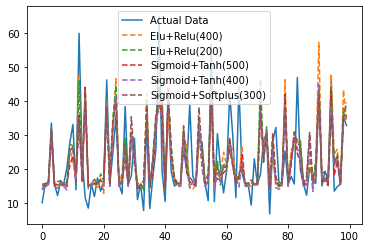

In [49]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
plt.plot(y_test[0:100], label= "Actual Data")
plt.plot(prediction_result_model1[0:100], label="Elu+Relu(400)",linestyle="--")
plt.plot(prediction_result_model2[0:100], label="Elu+Relu(200)",linestyle="--")
plt.plot(prediction_result_model3[0:100], label="Sigmoid+Tanh(500)",linestyle="--")
plt.plot(prediction_result_model4[0:100], label="Sigmoid+Tanh(400)",linestyle="--")
plt.plot(prediction_result_model5[0:100], label="Sigmoid+Softplus(300)",linestyle="--")
plt.legend()
plt.show()

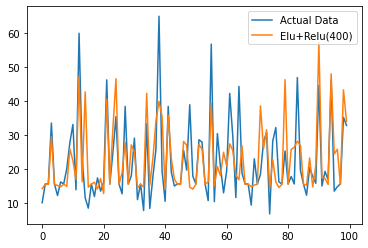

In [40]:
plt.plot(y_test[0:100], label= "Actual Data")
plt.plot(prediction_result_model1[0:100], label="Elu+Relu(400)")
plt.legend()
plt.show()